In [1]:
import Pkg
Pkg.add("CSV")
Pkg.add("Plots")
Pkg.add("DataFrames")
Pkg.add("Statistics")

using Random
Random.seed!(13)

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


MersenneTwister(UInt32[0x0000000d], Random.DSFMT.DSFMT_state(Int32[1942364238, 1073583280, 1215809738, 1073453074, -1714420386, 1073447762, -356802344, 1073021814, -1864483401, 1072881260  …  -56294547, 1072963348, 654307797, 1073646794, 598513278, -416580782, 1018899645, 745312242, 382, 0]), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], UInt128[0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000  …  0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x00000000000000000000000000000000, 0x000000000000

In [2]:
using Statistics, LinearAlgebra, DataFrames, Plots, StatsPlots, CSV

In [13]:
# using Pkg
# Pkg.add("StatsBase")
using StatsBase
using Dates

In [44]:
rides = CSV.read("rideshare_kaggle.csv")

693071×57 DataFrame. Omitted printing of 53 columns
│ Row    │ id                                   │ timestamp │ hour  │ day   │
│        │ String                               │ Float64   │ Int64 │ Int64 │
├────────┼──────────────────────────────────────┼───────────┼───────┼───────┤
│ 1      │ 424553bb-7174-41ea-aeb4-fe06d4f4b9d7 │ 1.54495e9 │ 9     │ 16    │
│ 2      │ 4bd23055-6827-41c6-b23b-3c491f24e74d │ 1.54328e9 │ 2     │ 27    │
│ 3      │ 981a3613-77af-4620-a42a-0c0866077d1e │ 1.54337e9 │ 1     │ 28    │
│ 4      │ c2d88af2-d278-4bfd-a8d0-29ca77cc5512 │ 1.54355e9 │ 4     │ 30    │
│ 5      │ e0126e1f-8ca9-4f2e-82b3-50505a09db9a │ 1.54346e9 │ 3     │ 29    │
│ 6      │ f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2 │ 1.54507e9 │ 18    │ 17    │
│ 7      │ 462816a3-820d-408b-8549-0b39e82f65ac │ 1.54321e9 │ 5     │ 26    │
│ 8      │ 474d6376-bc59-4ec9-bf57-4e6d6faeb165 │ 1.54378e9 │ 19    │ 2     │
│ 9      │ 4f9fee41-fde3-4767-bbf1-a00e108701fb │ 1.54382e9 │ 6     │ 3     │
│ 10     │ 8612d909-98b8-4454-a093-30bd48de0cb3 │ 1.54332e9 │ 10    │ 27    │
⋮
│ 693061 │ 50a7b6be-ed2a-4a11-8d36-73bd977ad66a │ 1.54373e9 │ 5     │ 2     │
│ 693062 │ 54362c72-124b-47e8-8d07-62a07cfff624 │ 1.54373e9 │ 5     │ 2     │
│ 693063 │ 64a50889-d05b-49de-b416-1802db5c27ac │ 1.54373e9 │ 5     │ 2     │
│ 693064 │ 6c1d9207-a9af-431e-a65f-3d9d205f28bf │ 1.54373e9 │ 5     │ 2     │
│ 693065 │ 25ed29df-4f9c-4aac-8218-681427f1d738 │ 1.54373e9 │ 5     │ 2     │
│ 693066 │ 353e6566-b272-479e-a9c6-98bd6cb23f25 │ 1.54371e9 │ 23    │ 1     │
│ 693067 │ 616d3611-1820-450a-9845-a9ff304a4842 │ 1.54371e9 │ 23    │ 1     │
│ 693068 │ 633a3fc3-1f86-4b9e-9d48-2b7132112341 │ 1.54371e9 │ 23    │ 1     │
│ 693069 │ 64d451d0-639f-47a4-9b7c-6fd92fbd264f │ 1.54371e9 │ 23    │ 1     │
│ 693070 │ 727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e │ 1.54371e9 │ 23    │ 1     │
│ 693071 │ e7fdc087-fe86-40a5-a3c3-3b2a8badcbda │ 1.54371e9 │ 23    │ 1     │

In [45]:
for x in names(rides)
    rides = rides[.!((rides[:,x]) .== "NA"), :];
end

In [46]:
rides[:price] = [parse(Float32,x) for x in rides[:price]] 

637976-element Array{Float32,1}:
  5.0
 11.0
  7.0
 26.0
  9.0
 16.5
 10.5
 16.5
  3.0
 27.5
 13.5
  7.0
 12.0
  ⋮
 17.0
 22.0
 14.0
 15.0
 15.0
 27.0
 17.0
  9.5
 13.0
  9.5
 27.0
 10.0

In [47]:
rides[:day_of_week] = rides[:id]
for x in 1:size(rides,1)
    t = Date(2018, rides[x,:month], rides[x, :day])
    rides[x,:day_of_week] = Dates.dayname(t);
end

rides[:,:day_of_week]

637976-element Array{String,1}:
 "Sunday"
 "Tuesday"
 "Wednesday"
 "Friday"
 "Thursday"
 "Monday"
 "Monday"
 "Sunday"
 "Monday"
 "Tuesday"
 "Friday"
 "Wednesday"
 "Friday"
 ⋮
 "Thursday"
 "Thursday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Sunday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"
 "Saturday"

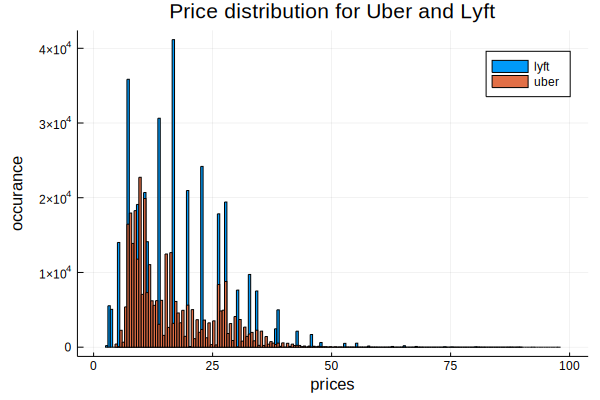

In [51]:
@df rides histogram(:price, group=:cab_type, label=["lyft" "uber"], 
    title = "Price distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("prices")

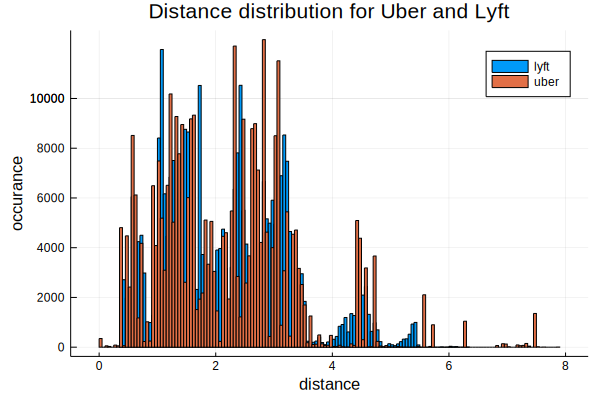

In [50]:
@df rides histogram(:distance, group=:cab_type, label=["lyft" "uber"], 
    title = "Distance distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("distance")

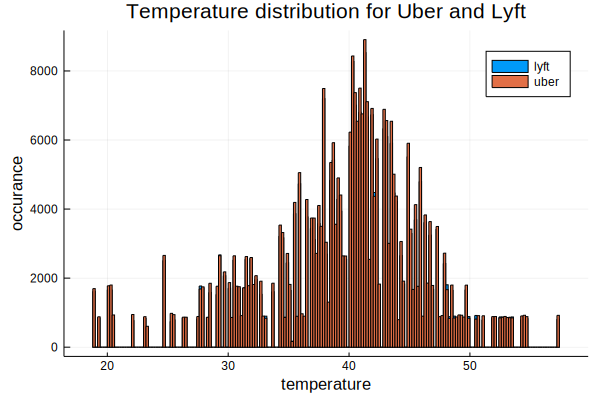

In [62]:
@df rides histogram(:temperature, group=:cab_type, label=["lyft" "uber"], 
    title = "Temperature distribution for Uber and Lyft")
ylabel!("occurance")
xlabel!("temperature")

Standardize the values of real features

In [41]:
labels = [
    :price
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]
for x in labels
    X = rides[:, x]
    dt = fit(ZScoreTransform, X, dims=1)
    rides[:, x] = StatsBase.transform(dt, X)
end

In [42]:
maximum(rides[:price])

8.682085f0

Create train/test split

In [19]:
#rides = rides[.!(ismissing.(rides[!, :price])), :]; # only consider the examples for which the price is known(just in case not cleaned)
rides = rides[shuffle(1:end), :] # we shuffle the data so that our train/test split will be truly random
feature_names = names(rides) # names of all feature
 
train_proportion = 0.8
n = size(rides, 1) #number of data
println("Size of dataset: ", string(n))

# Put the first ntrain observations in the DataFrame rides into the training set, and the rest into the test set
ntrain = convert(Int, round(train_proportion*n))

target = rides[:, :price]
data = rides[:, filter(col -> (col != :price), feature_names)]

# the following variable records the features of examples in the training set
train_x = data[1:ntrain,:]
# the following variable records the features of examples in the test set
test_x = data[ntrain+1:n,:]
# the following variable records the labels of examples in the training set
train_y = target[1:ntrain,:]
# the following variable records the labels of examples in the test set
test_y = target[ntrain+1:n,:]

train_x

Size of dataset: 637976


510381×57 DataFrame. Omitted printing of 51 columns
│ Row    │ id        │ timestamp │ hour  │ day   │ month │ datetime            │
│        │ String    │ Float64   │ Int64 │ Int64 │ Int64 │ String              │
├────────┼───────────┼───────────┼───────┼───────┼───────┼─────────────────────┤
│ 1      │ Monday    │ 1.54508e9 │ 21    │ 17    │ 12    │ 2018-12-17 21:20:03 │
│ 2      │ Sunday    │ 1.54495e9 │ 9     │ 16    │ 12    │ 2018-12-16 09:15:05 │
│ 3      │ Sunday    │ 1.54496e9 │ 10    │ 16    │ 12    │ 2018-12-16 10:25:06 │
│ 4      │ Friday    │ 1.54475e9 │ 1     │ 14    │ 12    │ 2018-12-14 01:15:10 │
│ 5      │ Wednesday │ 1.54336e9 │ 0     │ 28    │ 11    │ 2018-11-28 00:21:22 │
│ 6      │ Monday    │ 1.54324e9 │ 13    │ 26    │ 11    │ 2018-11-26 13:20:09 │
│ 7      │ Monday    │ 1.5438e9  │ 2     │ 3     │ 12    │ 2018-12-03 02:38:03 │
│ 8      │ Wednesday │ 1.54341e9 │ 12    │ 28    │ 11    │ 2018-11-28 12:50:07 │
│ 9      │ Tuesday   │ 1.54389e9 │ 1     │ 4     │ 12    │ 2018-12-04 01:58:02 │
│ 10     │ Monday    │ 1.54324e9 │ 12    │ 26    │ 11    │ 2018-11-26 12:38:09 │
⋮
│ 510371 │ Monday    │ 1.5438e9  │ 0     │ 3     │ 12    │ 2018-12-03 00:28:00 │
│ 510372 │ Monday    │ 1.54503e9 │ 8     │ 17    │ 12    │ 2018-12-17 08:10:05 │
│ 510373 │ Sunday    │ 1.54499e9 │ 19    │ 16    │ 12    │ 2018-12-16 19:15:07 │
│ 510374 │ Friday    │ 1.54357e9 │ 9     │ 30    │ 11    │ 2018-11-30 09:38:03 │
│ 510375 │ Thursday  │ 1.54468e9 │ 4     │ 13    │ 12    │ 2018-12-13 04:30:02 │
│ 510376 │ Thursday  │ 1.5447e9  │ 10    │ 13    │ 12    │ 2018-12-13 10:20:07 │
│ 510377 │ Wednesday │ 1.54341e9 │ 12    │ 28    │ 11    │ 2018-11-28 12:06:25 │
│ 510378 │ Sunday    │ 1.54379e9 │ 22    │ 2     │ 12    │ 2018-12-02 22:28:02 │
│ 510379 │ Wednesday │ 1.54342e9 │ 16    │ 28    │ 11    │ 2018-11-28 16:11:08 │
│ 510380 │ Wednesday │ 1.5434e9  │ 9     │ 28    │ 11    │ 2018-11-28 09:40:33 │
│ 510381 │ Monday    │ 1.54323e9 │ 11    │ 26    │ 11    │ 2018-11-26 11:08:09 │

First look at real valued features

In [20]:
labels_real = [
    :distance
    :temperature
    :windSpeed
    :humidity
    :visibility
]

5-element Array{Symbol,1}:
 :distance
 :temperature
 :windSpeed
 :humidity
 :visibility

In [21]:
# the following variable should have as many columns as real variables, and as many rows as examples in the training set      
train_vals_real = convert(Matrix,train_x[:,labels_real])
# the following variable should have as many columns as real variables, and as many rows as examples in the test set      
test_vals_real = convert(Matrix,test_x[:,labels_real])

127595×5 Array{Float64,2}:
  0.90781    -0.0256347   0.610957   -0.368434   0.586826
  0.978269   -1.19135    -1.53654    -0.368434   0.588363
 -1.30284    -0.375051    0.147149   -0.368434   0.542242
 -0.906508    0.594394    1.84037     1.43564   -1.41561
 -1.44376     0.699962    1.24949     1.29132   -2.13933
 -0.686324    1.91325    -0.392901    0.930501   0.588363
 -0.897701    0.0918287  -1.00284    -0.657086   0.378511
  0.212028   -0.278404    0.506124    1.14699   -0.39556
 -0.862471   -1.02779    -1.18074    -1.52304    0.559922
 -1.29403     0.891769   -1.5683      1.57997   -2.71201
 -1.30284     0.655356   -1.28875    -1.59521    0.517259
 -0.747975   -0.453856   -0.243593   -0.224108   0.57837
  0.344138    1.0464     -0.847178    1.00266    0.49612
  ⋮                                             
 -0.26357     0.189963   -1.04414    -1.16223    0.545317
 -1.38211    -0.272456   -0.971072   -0.584923   0.487665
  0.758084   -0.535634   -0.0847546  -0.296271   0.528021
  

Produce our training features, use the real valued features with an offset. 

In [22]:
Xtrain_real = hcat(train_vals_real, ones(ntrain))
Xtest_real = hcat(test_vals_real, ones(n-ntrain))

127595×6 Array{Float64,2}:
  0.90781    -0.0256347   0.610957   -0.368434   0.586826  1.0
  0.978269   -1.19135    -1.53654    -0.368434   0.588363  1.0
 -1.30284    -0.375051    0.147149   -0.368434   0.542242  1.0
 -0.906508    0.594394    1.84037     1.43564   -1.41561   1.0
 -1.44376     0.699962    1.24949     1.29132   -2.13933   1.0
 -0.686324    1.91325    -0.392901    0.930501   0.588363  1.0
 -0.897701    0.0918287  -1.00284    -0.657086   0.378511  1.0
  0.212028   -0.278404    0.506124    1.14699   -0.39556   1.0
 -0.862471   -1.02779    -1.18074    -1.52304    0.559922  1.0
 -1.29403     0.891769   -1.5683      1.57997   -2.71201   1.0
 -1.30284     0.655356   -1.28875    -1.59521    0.517259  1.0
 -0.747975   -0.453856   -0.243593   -0.224108   0.57837   1.0
  0.344138    1.0464     -0.847178    1.00266    0.49612   1.0
  ⋮                                                        ⋮
 -0.26357     0.189963   -1.04414    -1.16223    0.545317  1.0
 -1.38211    -0.272456   -0.97

Fit the linear model, compute and print the MSE, and plot the predicted versus the real data. 

In [23]:
"""This function just computes the mean squared error."""
function MSE(y, pred)
    return mean((y - pred).^2)
end

"""This function plots the main diagonal; 
for a "predicted vs true" plot with perfect predictions,
all data lies on this line"""
function plotDiagonal(xmin, xmax)
    xsamples = [xmin, xmax]
    plot!(xsamples, xsamples, color=:black)
end

"""This helper funciton plots x vs, y and labels the axes."""
function plotdata(x,y,xname, yname; margin=.05, plotDiag=true, zeromin=false,data_label="data")
    scatter(x,y, label=data_label)
    xlabel!(xname)
    ylabel!(yname)
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    if plotDiag
        plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)
    end
    if zeromin
        ylims!((0.0,maximum(y)+margin*range_y))
        xlims!((0.0,maximum(x)+margin*range_x))
    else
        ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
        xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))
    end
end

"""This function plots the predicted labels vs the actual labels
(We only plots the first 10000 points to avoid slow plots.)"""
function plot_pred_true(test_pred, test_y, max_points = 10000)
    plotdata(test_pred[1:max_points], test_y[1:max_points], "Predicted (\$)", "True (\$)", zeromin=true)
end

plot_pred_true

In [24]:
# The weights of the linear equation (compute via least squares)
w = Xtrain_real\train_y
print("weights when only considering real valued features: ", '\n',w)

train_pred = Xtrain_real*w
test_pred = Xtest_real*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when only considering real valued features: 
[0.3460778392056164; -0.00018570428440778692; 0.00028140506540973474; -7.389861455729411e-6; -0.00029504197504546696; 0.00044102593274141395]

0.8778718709763312

MSE of train dataset and test dataset:

Train MSE	0.8816984373814963
Test MSE 	0.8778718709763312


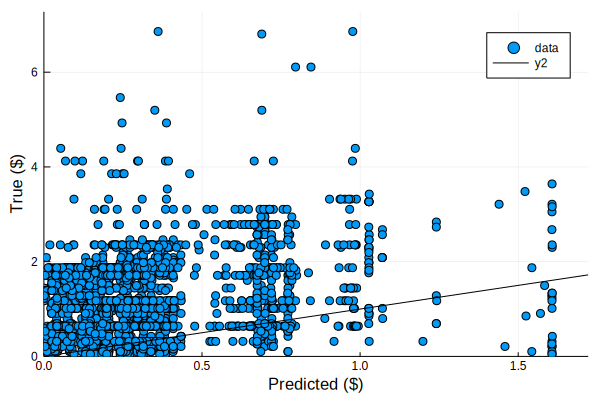

In [25]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

Add in boolean and categorical data

In [26]:
cat_labels = [
  :name
  :cab_type
    :day_of_week
]

cats_sets = [unique(train_x[:, label]) for label in cat_labels]
function onehot(column, cats=unique(column))
    result = zeros(size(column, 1), size(cats,1))
    for i in 1:size(column, 1)
        for j in 1:size(cats,1)
            if column[i] == cats[j]
                result[i,j] = 1
            end
        end
    end
    result
end

train_cat_vals = hcat([onehot(train_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...)
test_cat_vals = hcat([onehot(test_x[:, cat_labels[i]], cats_sets[i]) for i in 1:size(cat_labels, 1)]...) 

127595×21 Array{Float64,2}:
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  …  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  

In [27]:
cats_sets

3-element Array{Array{String,1},1}:
 ["Lyft", "Shared", "Lux", "UberPool", "UberXL", "UberX", "Black SUV", "Lyft XL", "Lux Black XL", "Black", "Lux Black", "WAV"]
 ["Lyft", "Uber"]
 ["Monday", "Sunday", "Friday", "Wednesday", "Tuesday", "Saturday", "Thursday"]

In [28]:
# concatenate the real and boolean/categorical features to form X matrix
Xtrain = hcat(train_vals_real,train_cat_vals,ones(ntrain))
Xtest = hcat(test_vals_real,test_cat_vals,ones(n-ntrain))


127595×27 Array{Float64,2}:
  0.90781    -0.0256347   0.610957   …  0.0  0.0  0.0  0.0  0.0  1.0  1.0
  0.978269   -1.19135    -1.53654       0.0  1.0  0.0  0.0  0.0  0.0  1.0
 -1.30284    -0.375051    0.147149      0.0  0.0  0.0  1.0  0.0  0.0  1.0
 -0.906508    0.594394    1.84037       0.0  0.0  0.0  1.0  0.0  0.0  1.0
 -1.44376     0.699962    1.24949       0.0  0.0  0.0  1.0  0.0  0.0  1.0
 -0.686324    1.91325    -0.392901   …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.897701    0.0918287  -1.00284       0.0  0.0  0.0  0.0  1.0  0.0  1.0
  0.212028   -0.278404    0.506124      0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -0.862471   -1.02779    -1.18074       0.0  0.0  0.0  0.0  0.0  1.0  1.0
 -1.29403     0.891769   -1.5683        0.0  0.0  0.0  0.0  0.0  0.0  1.0
 -1.30284     0.655356   -1.28875    …  0.0  0.0  0.0  0.0  1.0  0.0  1.0
 -0.747975   -0.453856   -0.243593      0.0  0.0  1.0  0.0  0.0  0.0  1.0
  0.344138    1.0464     -0.847178      0.0  0.0  0.0  0.0  1.0  0.0  1.0
  ⋮       

In [29]:
# The weights of the linear equation (compute via least squares)
w = Xtrain\train_y
print("weights when considering real/boolean/categorical features: ", '\n',w)

train_pred = Xtrain*w
test_pred = Xtest*w

train_MSE = MSE(train_y,train_pred)
test_MSE = MSE(test_y,test_pred)

weights when considering real/boolean/categorical features: 
[0.3456039521826158; -0.0005313468593776458; 0.0009463988334715244; -0.00063891880978441; 0.00019907828412614283; -0.8187377379790288; -1.202986058390156; 0.057345629549256566; -0.766812864441682; -0.024817380008166738; -0.6591665193975782; 1.541556742083409; -0.20647124086745716; 1.6191439054051617; 0.49583887339023436; 0.6247546015345261; -0.657855936878341; 0.0730490992523034; -0.0712570852521243; 0.0025560921265272646; -0.0007151942867388405; -0.0011745779327269168; -0.0006747011543297261; 0.0002019328744727423; 0.0019083523010150955; -0.0003098899280404915; 0.0017920140001791516]

0.10526788717528458

Train MSE	0.10692559039091742
Test MSE 	0.10526788717528458


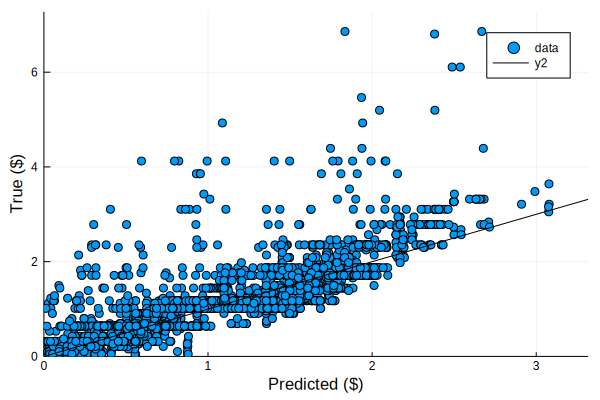

In [30]:
println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

plot_pred_true(test_pred, test_y)

With color differentiate lyft and uber:

In [31]:
no_lyft = []
no_uber = []

for i in 1:size(Xtest)[1]
    if Xtest[i,18]==1
        append!(no_lyft,i)
    else
        append!(no_uber,i)
    end
end
        
X_lyft=Xtest[no_lyft,:]
X_uber=Xtest[no_uber,:]

test_pred_lyft = X_lyft*w #prediction of lyft
test_pred_uber = X_uber*w #prediction of uber

test_y_lyft = test_y[no_lyft,:] #true value of lyft
test_y_uber = test_y[no_uber,:] #true value of uber

65989×1 Array{Float32,2}:
 -0.7019385
 -0.7019385
  1.1212434
 -0.9164305
  1.0139973
 -1.0236765
 -1.0236765
  1.2821122
 -0.9700535
  0.53139037
 -1.1845455
  0.4241444
  0.79950535
  ⋮
 -0.5946925
 -0.75556153
  0.2096524
 -1.0236765
 -0.6483155
  0.10240641
  1.0139973
 -0.9164305
 -0.48744655
 -0.6483155
  2.4618182
  0.5850134

Together in one graph

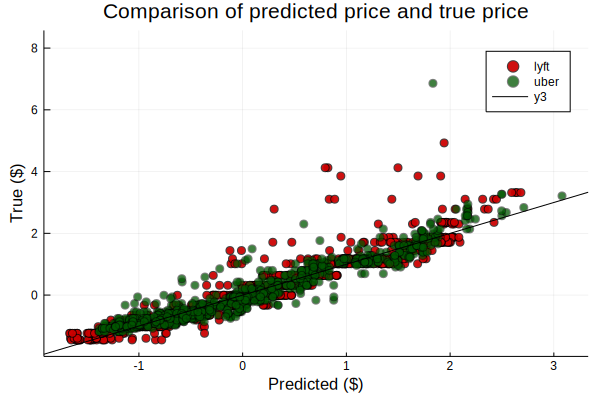

In [64]:
scatter(test_pred_lyft[1:1000], test_y_lyft[1:1000], label="lyft",color=:red,markeralpha=0.75)
scatter!(test_pred_uber[1:1000], test_y_uber[1:1000], label="uber",color=:green,markeralpha=0.5,
title="Comparison of predicted price and true price")

xlabel!("Predicted (\$)")
ylabel!("True (\$)")
x=test_pred
y=test_y
margin=.05
range_y = maximum(y) - minimum(y)
range_x = maximum(x) - minimum(x)
plotDiagonal(minimum(x)-margin*range_x, maximum(x)+margin*range_x)

ylims!((minimum(y)-margin*range_y,maximum(y)+margin*range_y))
xlims!((minimum(x)-margin*range_x,maximum(x)+margin*range_x))



In [ ]:
# proxgrad technique
loss = 1/n*LogisticLoss()

λ = .5
reg = λ*QuadReg()

# minimize 
w = proxgrad(loss, reg, X, ybool, maxiters=100) 

In [ ]:
# LowRankModel

In [ ]:
# svd